# Group Assignment - Chapter I

## AI Environment Creation & Testing

### Tools Used:
- Anaconda | Anaconda Navigator => ***Add Description***
- Jupyter Notebook => ***Add Description***
- Python *v.3.8* => ***Add Description***

### Libraries Installed:
- Tensorflow *v.2.3* => ***Add Description***
- Keras *v.2.4.3* => ***Add Description***
- Numpy *v.1.19.2* => ***Add Description***
- Scipy *v.1.5.2* => ***Add Description***
- Matplotlib *v.3.3.2* => ***Add Description***
- Pandas *v.1.2.0* => ***Add Description***
- Scikit-learn *v.0.23.2* => ***Add Description***

### Dataset:
***Title***: Crime Statistics for South Africa   
***Content***: The dataset contains South African crime statistics per province, station and crime type   

***Data Sources***: 
- [1] "Crime Statistics for South Africa", Kaggle.com, 2021. [Online]. Available: https://www.kaggle.com/slwessels/crime-statistics-for-south-africa?select=SouthAfricaCrimeStats_v2.csv. [Accessed: 22- Jan- 2021].
- [2] "About Us | SAPS (South African Police Service)", Saps.gov.za, 2021. [Online]. Available: http://www.saps.gov.za/resource_centre/publications/statistics/crimestats/2015/crime_stats.php. [Accessed: 22- Jan- 2021].

In [84]:
# importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [15]:
# Loading the data

# Using pandas and load the dataset as a pandas Dataframe
data = pd.read_csv("SouthAfricaCrimeStats_v2.csv")
# head() method will display the first 5 elements by default if no parameter has been set
data.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [16]:
# Number of rows and columns
data.shape

(30861, 14)

In [4]:
# Exploring the dataset

# Finding the columns name
data.columns

Index(['Province', 'Station', 'Category', '2005-2006', '2006-2007',
       '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012',
       '2012-2013', '2013-2014', '2014-2015', '2015-2016'],
      dtype='object')

In [5]:
# Unique value in Province, Station and Category of crime
data.Province.unique()

array(['Western Cape', 'Gauteng', 'Free State', 'North West',
       'Kwazulu/Natal', 'Mpumalanga', 'Eastern Cape', 'Limpopo',
       'Northern Cape'], dtype=object)

In [9]:
data.Station.unique()

array(['Cape Town Central', 'Jhb Central', 'Mitchells Plain', ...,
       'Belhar', 'Lentegeur', 'Lwandle'], dtype=object)

In [7]:
data.Category.unique()

array(['All theft not mentioned elsewhere',
       'Theft out of or from motor vehicle', 'Drug-related crime',
       'Robbery with aggravating circumstances', 'Common assault',
       'Commercial crime', 'Burglary at residential premises',
       'Assault with the intent to inflict grievous bodily harm',
       'Theft of motor vehicle and motorcycle', 'Shoplifting',
       'Malicious damage to property', 'Common robbery',
       'Burglary at non-residential premises', 'Sexual Offences',
       'Driving under the influence of alcohol or drugs', 'Stock-theft',
       'Attempted murder', 'Carjacking',
       'Robbery at non-residential premises',
       'Robbery at residential premises', 'Murder',
       'Illegal possession of firearms and ammunition', 'Arson',
       'Truck hijacking', 'Robbery of cash in transit', 'Bank robbery',
       'Sexual offences as result of police action'], dtype=object)

In [17]:
# Describing data to view basic statistical details
data.describe()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
count,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000
mean,70.527753,69.301610,67.154305,68.756165,69.517773,67.766696,68.259616,69.700658,71.416999,71.498202,70.736496
std,205.491698,198.037635,186.760510,187.173860,185.514638,181.865878,183.334468,184.812420,187.635207,185.019046,179.363964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000,10.000000,11.000000,11.000000,11.000000
75%,49.000000,50.000000,50.000000,52.000000,54.000000,52.000000,53.000000,55.000000,56.000000,57.000000,58.000000
max,6692.000000,6341.000000,6316.000000,6803.000000,6571.000000,6260.000000,6108.000000,6310.000000,6044.000000,5335.000000,5176.000000


In [56]:
# The total numbers of "Drug-related crime" for each province over the years

# 1. Create a copy of the original data
# 2. Drop the category which is not equal to the drug related crime
# 3. Group it by province using the mean method
df_drug = data.loc[:, ['Province', 'Category', '2005-2006', '2006-2007',
       '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012',
       '2012-2013', '2013-2014', '2014-2015', '2015-2016']]
df_drug = df_drug[df_drug.Category == 'Drug-related crime'].groupby(["Province"]).sum()
df_drug =df_drug.T.reset_index()
df_drug

Province,index,Eastern Cape,Free State,Gauteng,Kwazulu/Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape
0,2005-2006,6991,5002,14105,23202,1976,1791,5039,2079,34616
1,2006-2007,7176,5381,12511,26222,2177,2064,5733,2113,40992
2,2007-2008,7978,4508,12641,24096,3196,1765,6586,2196,45936
3,2008-2009,8419,4537,13459,23817,3314,1640,7099,1931,52733
4,2009-2010,8926,5081,14696,28692,4834,2039,7694,2367,60358
5,2010-2011,9557,4189,16432,32454,4633,3167,7163,2412,70554
6,2011-2012,11643,4455,25923,37414,5253,4151,7677,2667,77035
7,2012-2013,12871,6153,38131,42167,7528,5834,9152,2852,82033
8,2013-2014,15032,8189,74667,45950,9608,7459,11007,3247,85437
9,2014-2015,16038,8776,70264,47377,11716,8841,11632,3527,88731


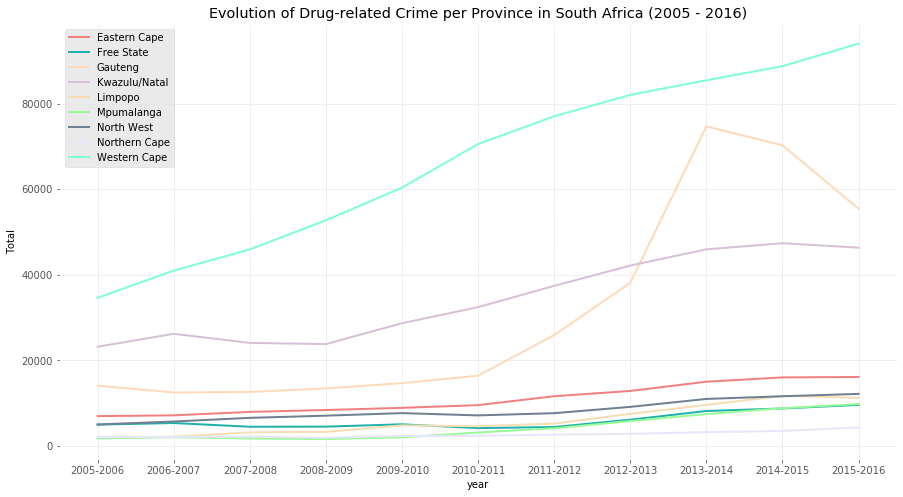

In [86]:
# Plotting the evolution of total numbers of "Drug-related crime" reported over the years per province
plt.style.use("ggplot")
col = ['Eastern Cape', 'Free State', 'Gauteng', 'Kwazulu/Natal',
       'Limpopo', 'Mpumalanga', 'North West', 'Northern Cape',
       'Western Cape']

fig, ax = plt.subplots(figsize=(15,8)) 
ax.plot(df_drug['index'], df_drug['Eastern Cape'], color='lightcoral', linewidth=2)  
ax.plot(df_drug['index'], df_drug['Free State'], color='lightseagreen', linewidth=2) 
ax.plot(df_drug['index'], df_drug['Gauteng'], color='peachpuff', linewidth=2) 
ax.plot(df_drug['index'], df_drug['Kwazulu/Natal'], color='thistle', linewidth=2) 
ax.plot(df_drug['index'], df_drug['Limpopo'], color='wheat', linewidth=2) 
ax.plot(df_drug['index'], df_drug['Mpumalanga'], color='palegreen', linewidth=2) 
ax.plot(df_drug['index'], df_drug['North West'], color='slategray', linewidth=2) 
ax.plot(df_drug['index'], df_drug['Northern Cape'], color='lavender', linewidth=2) 
ax.plot(df_drug['index'], df_drug['Western Cape'], color='aquamarine', linewidth=2) 

ax.set_xlabel('year', fontsize=10, color='black')  
ax.set_ylabel('Total', fontsize=10, color='black') 
ax.set_title("Evolution of Drug-related Crime per Province in South Africa (2005 - 2016)") 
ax.legend(col, loc ="best") 

# for line, name in zip(ax.lines, col):
#     y = line.get_ydata()[-1]
#     ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
#                 xycoords = ax.get_yaxis_transform(), textcoords="offset points",
#                 size=10, va="center")
    
ax.set_facecolor('white')
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
